In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 128
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 319 		 0.1 		 0.1 |
| 3168 		 0.1 		 0.1 |
| 2825 		 0.1 		 0.1 |
| 1951 		 0.1 		 0.1 |
| 452 		 0.1 		 0.1 |
| 417 		 0.1 		 0.1 |
| 407 		 0.1 		 0.1 |
| 1481 		 0.1 		 0.1 |
| 1161 		 0.1 		 0.1 |
| 142 		 0.1 		 0.1 |
| 2711 		 0.1 		 0.1 |
| 656 		 0.1 		 0.1 |
| 4132 		 0.1 		 0.1 |
| 4474 		 0.1 		 0.1 |
| 1677 		 0.1 		 0.1 |
| 370 		 0.1 		 0.1 |
| 3452 		 0.1 		 0.1 |
| 4762 		 0.1 		 0.1 |
| 311 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1221.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1873
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


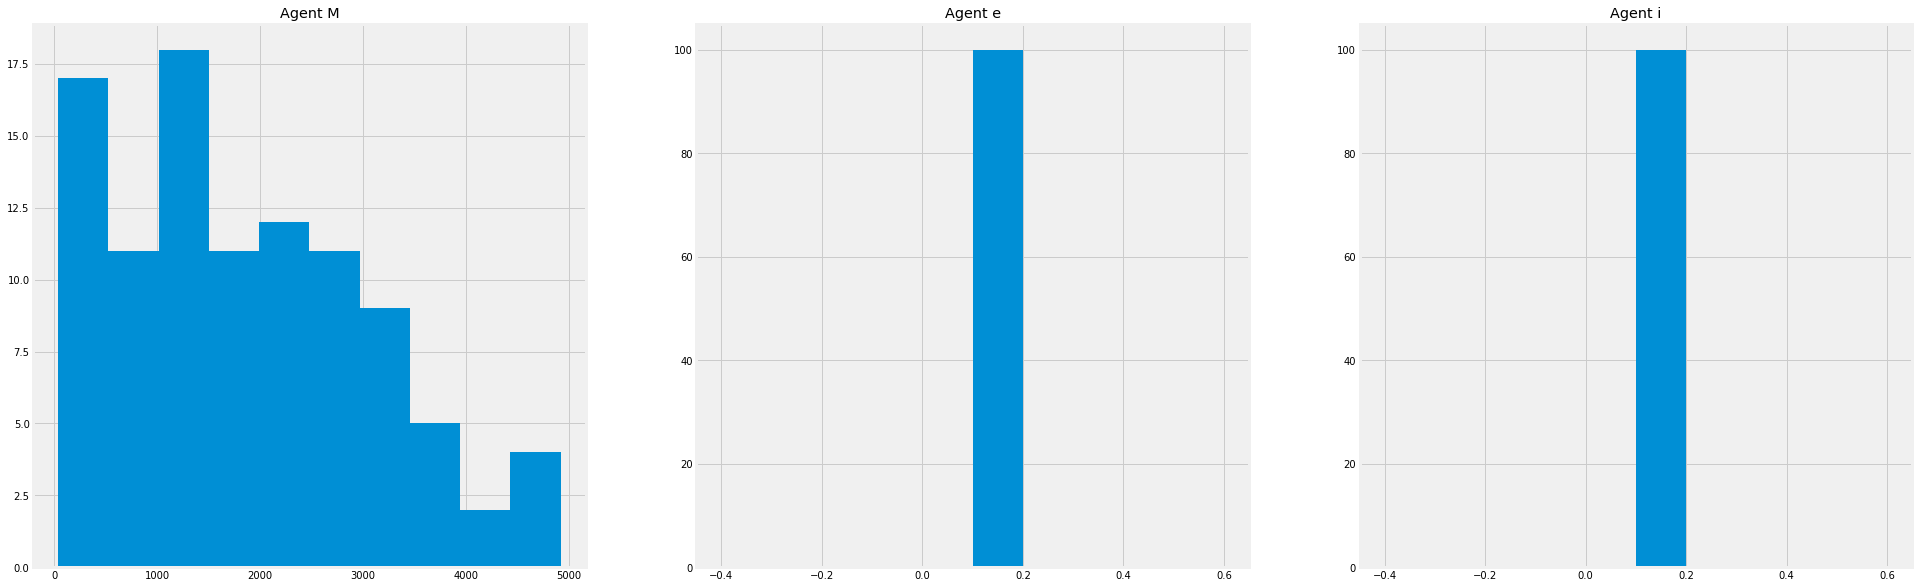

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 285.0, Temptation: 317.0, Sucker: -32.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 29.0, Temptation: 32.0, Sucker: -3.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 254.0, Temptation: 282.0, Sucker: -28.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 29.0, Temptation: 32.0, Sucker: -3.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 176.0, Temptation: 195.0, Sucker: -20.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 29.0, Temptation: 32.0, Suck

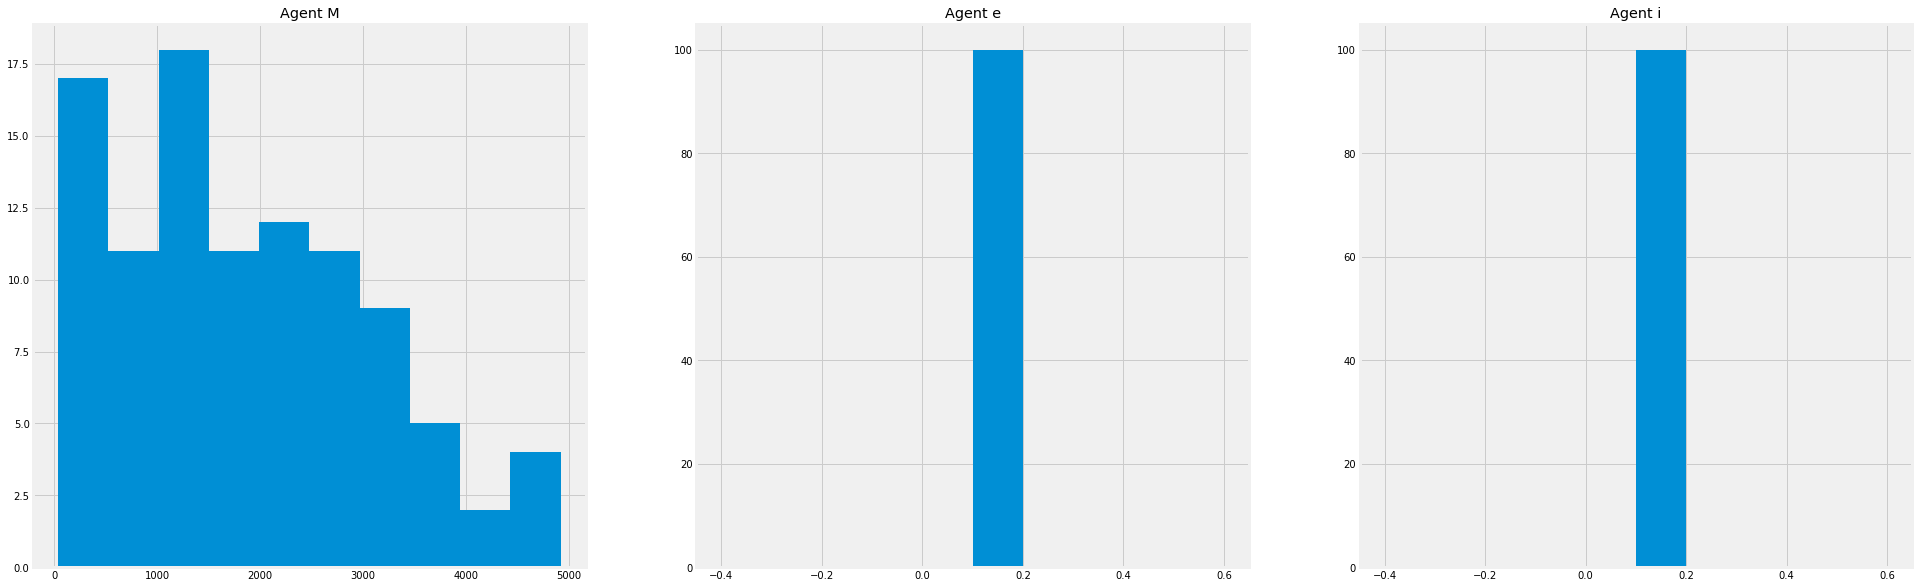

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 37 minutes.
    S.D.  Counts Seed
0    0.5     258  128
1    0.6     271  128
2    0.7     246  128
3    0.8     209  128
4    0.9     186  128
5    1.0     170  128
6    1.1     143  128
7    1.2     113  128
8    1.3     119  128
9    1.4     113  128
10   1.5      90  128
11   1.6      82  128
12   1.7      75  128
13   1.8      49  128
14   1.9      45  128
15   2.0      39  128
16   2.1      34  128
17   2.2      28  128
18   2.3      22  128
19   2.4      14  128
20   2.5       9  128
21   2.6       5  128
22   2.7       2  128
23   2.8       1  128
24   2.9       0  128
25   3.0       0  128


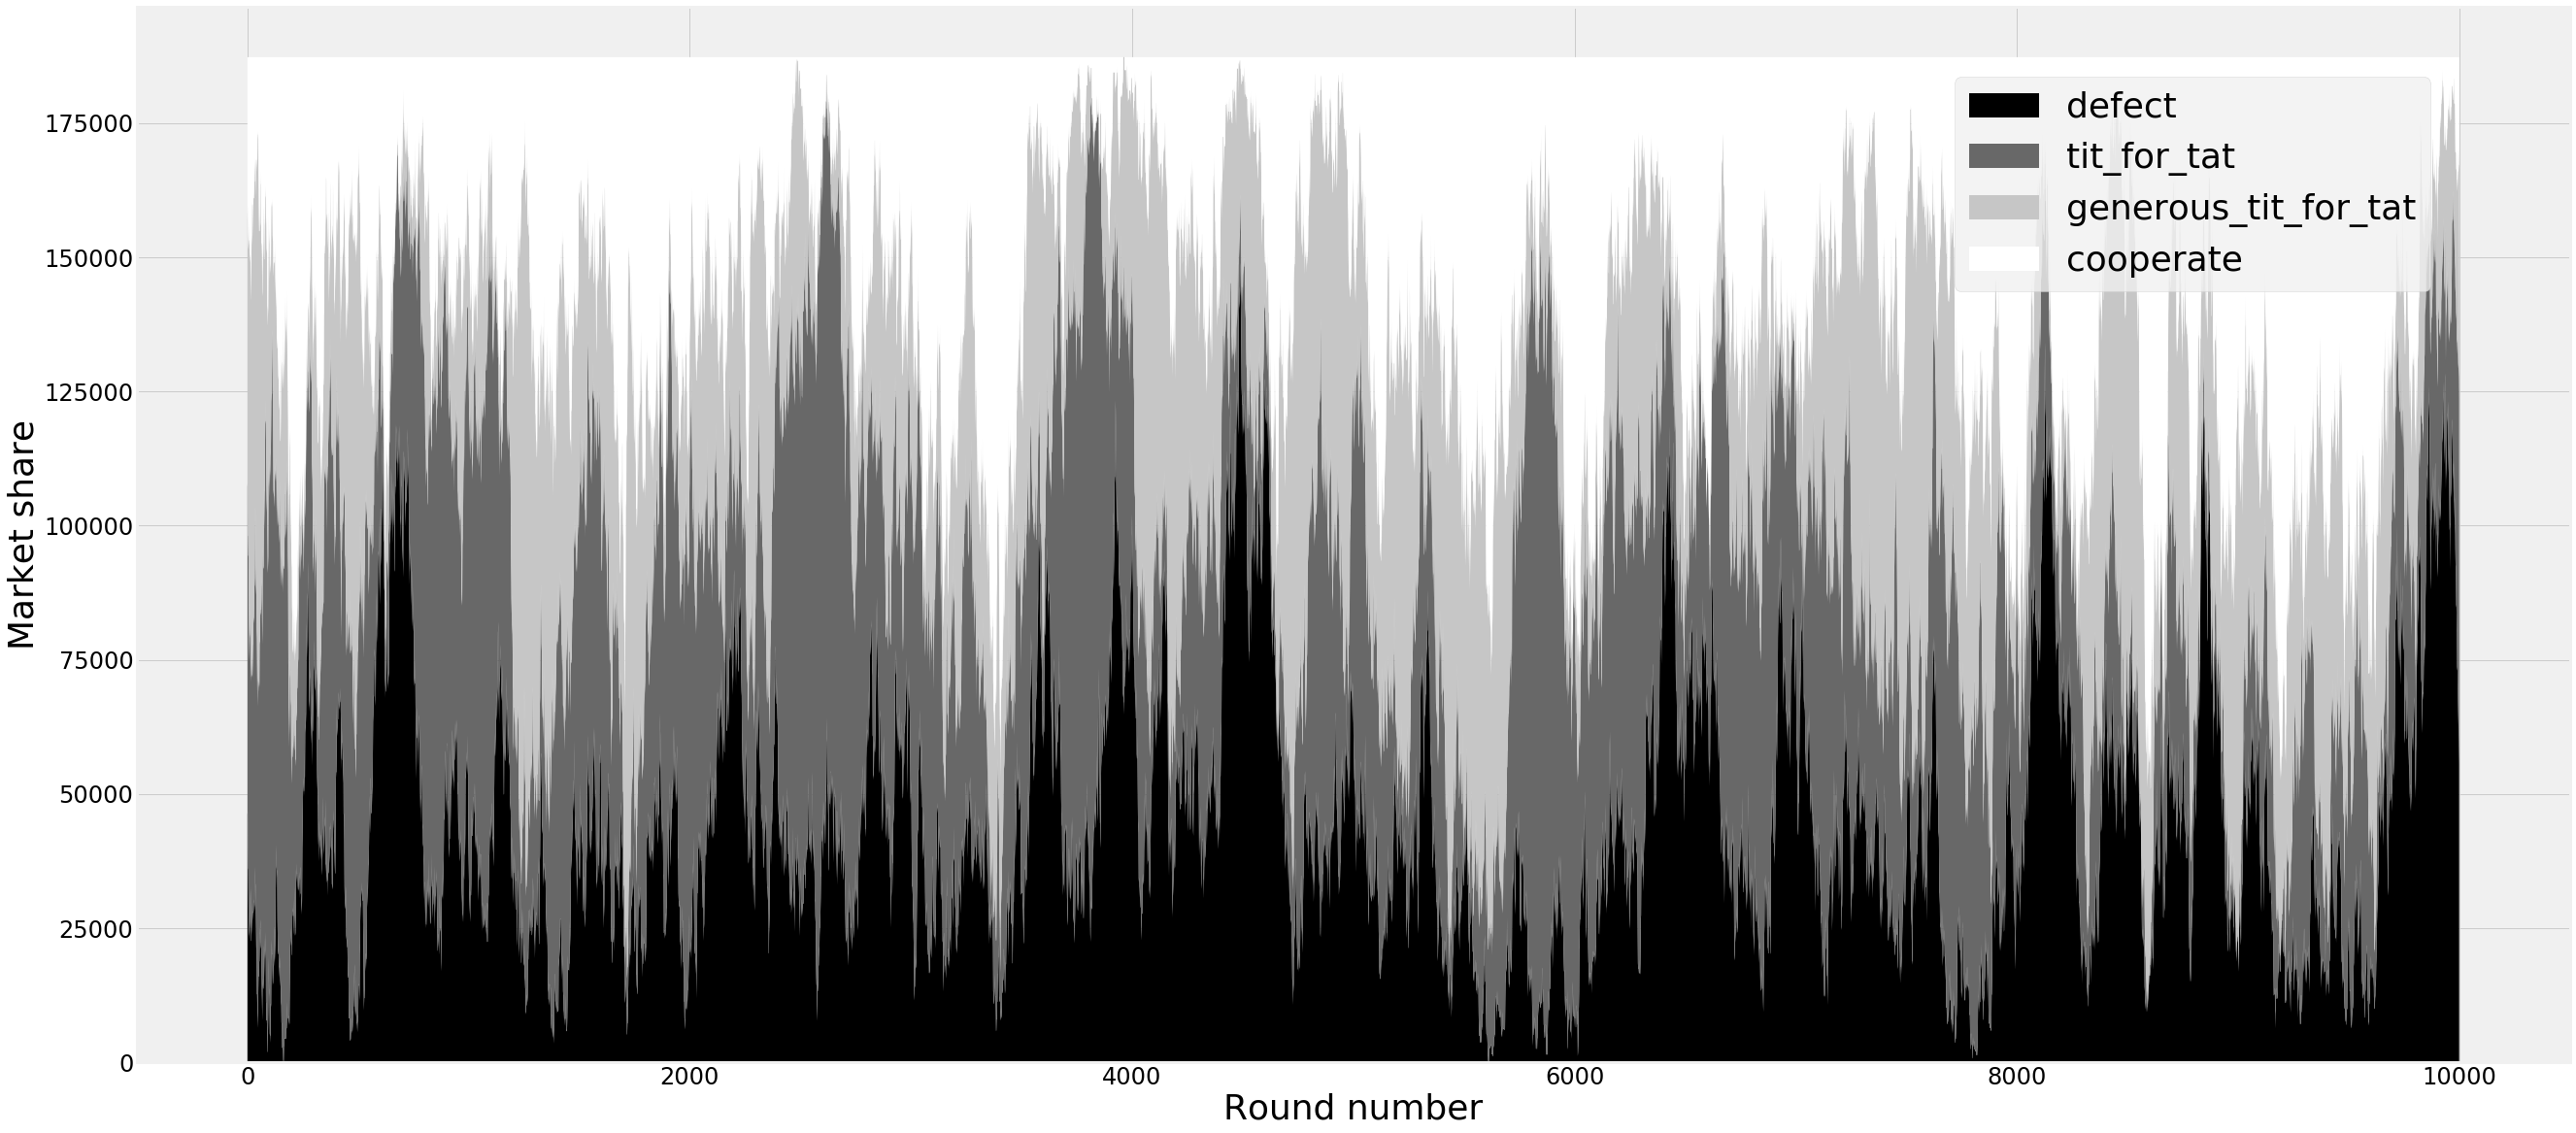

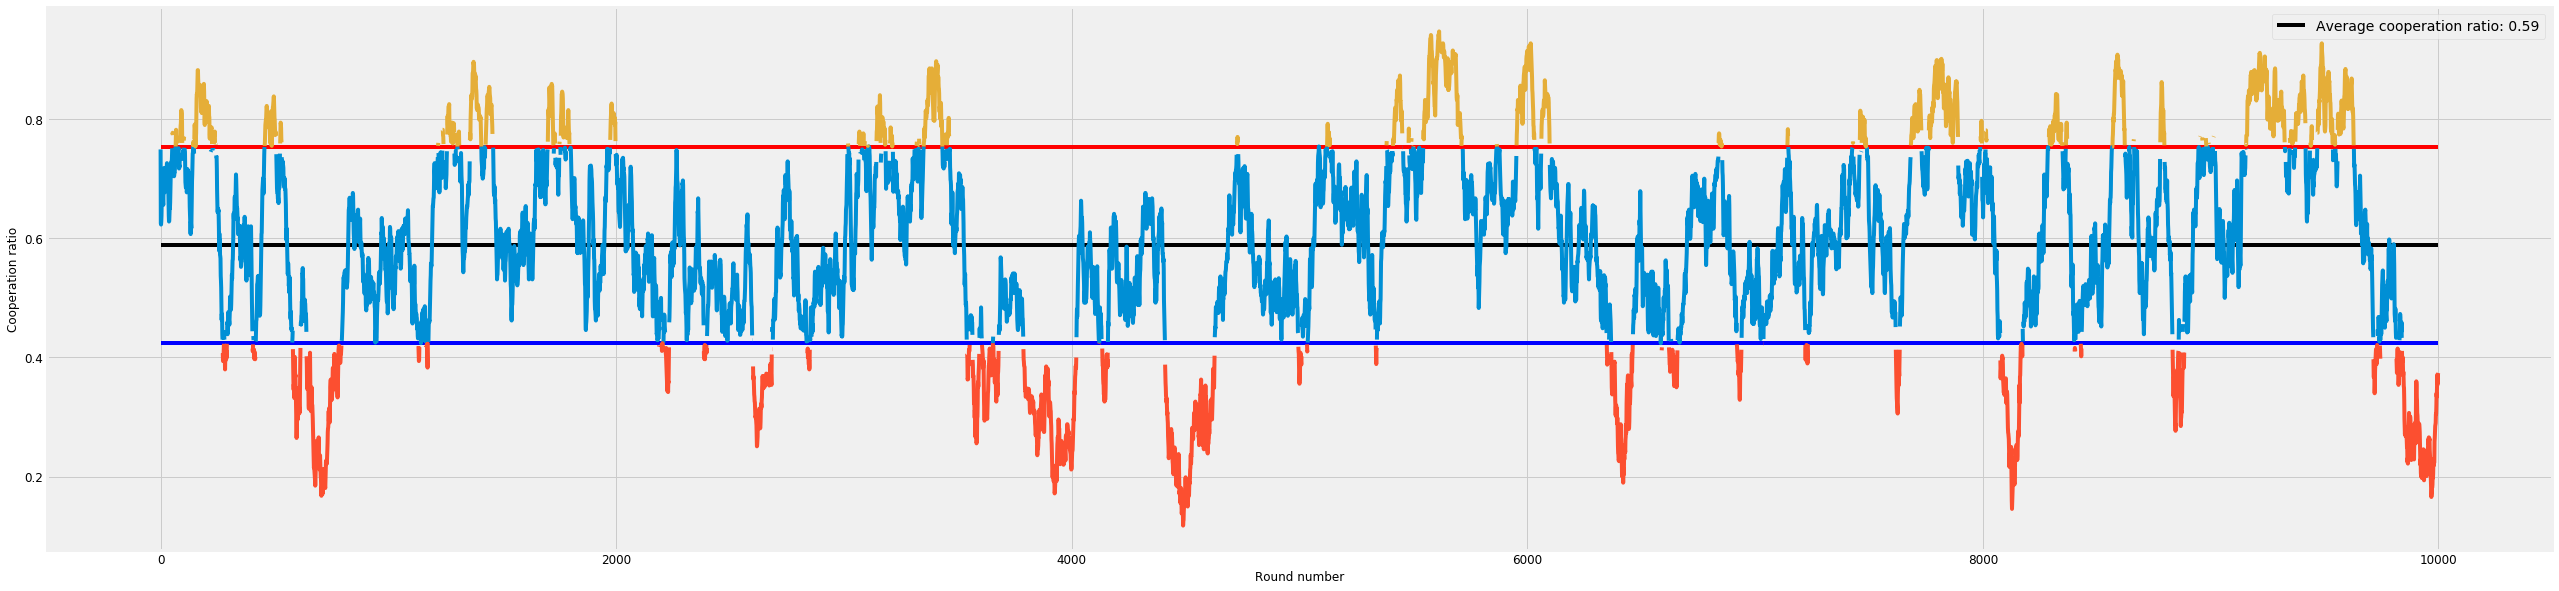

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))